IMPORTING DEPENDENCIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

DATA COLLECTION AND PREPROCESSING

In [2]:
# load the dataset
titanic=pd.read_csv("C:\\Users\\arunk\\Downloads\\archive\\Titanic-Dataset.csv")
titanic.head() #printing first 5 rows of our dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Here we will take a moment and understand in detail about this Titanic Dataset.
1. Here Survival columns states that weather the passengers survived or not 0 = Not survived , 1 = Survived.
2. Here Pclass is nothing but Ticket class that is 1 = 1st ,2 = 2nd ,3 = 3rd classes.
3. Here sibsp is number of siblings / spouses aboard the titanic.
4. parch is number of parents / chicken aboard the titanic.
5. ticker is ticket number.
6. fare is passenger fare amount.
7. cabin is cabin number
8. embarked is Port of embarkation C = Cherbourg, Q = Queenstown, S = Southampton.

In [3]:
#check for number of rows and columns 
titanic.shape

(891, 12)

In [4]:
# Extra info about the data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# checking number for missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling the missing values

In [6]:
#droping the cabin column from the dataset
titanic=titanic.drop(columns='Cabin', axis=1)

In [7]:
# replacing missing values in the Age column with mean value
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())


In [8]:
#find the mode value of embarked column
print(titanic['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [9]:
print(titanic['Embarked'].mode()[0])

S


In [10]:
# replacing the missing values in embarked column with mode
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

In [11]:
# checking number of missing values after handling
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

A

In [12]:
# statistical measures about the data
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# number of people survived and not survived
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

VISUALIZATION

<Axes: xlabel='Survived', ylabel='count'>

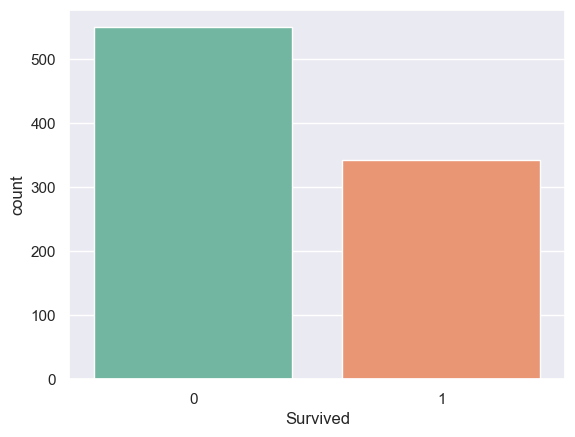

In [14]:
# count plot for Survived column
sns.set()
#sns.countplot('Survived',data=titanic)
sns.countplot(x='Survived', data=titanic, hue='Survived', palette='Set2', dodge=False, legend=False)

In [15]:
titanic['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

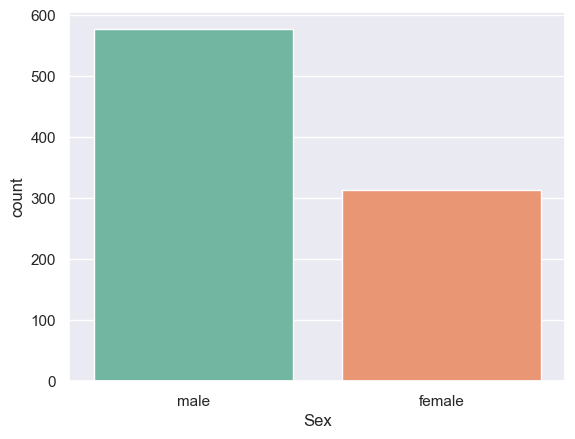

In [16]:
# count plot for Sex column
sns.set()
sns.countplot(x='Sex', data=titanic, hue='Sex', palette='Set2', dodge=False, legend=False)

<Axes: xlabel='Sex', ylabel='count'>

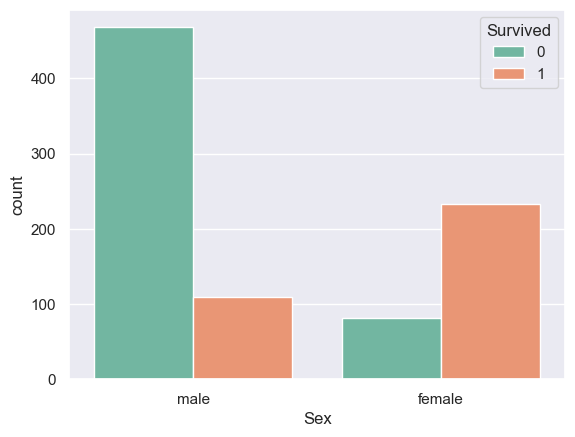

In [17]:
# number of survivors based on Gender
sns.set()
sns.countplot(x='Sex', hue='Survived', data=titanic, palette='Set2')

<Axes: xlabel='Pclass', ylabel='count'>

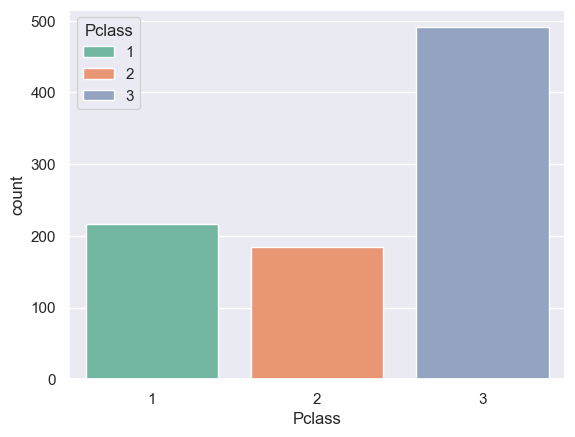

In [18]:
#Plotting for Pclass Column
sns.set()
sns.countplot(x='Pclass', hue='Pclass', data=titanic, palette='Set2')

<Axes: xlabel='Pclass', ylabel='count'>

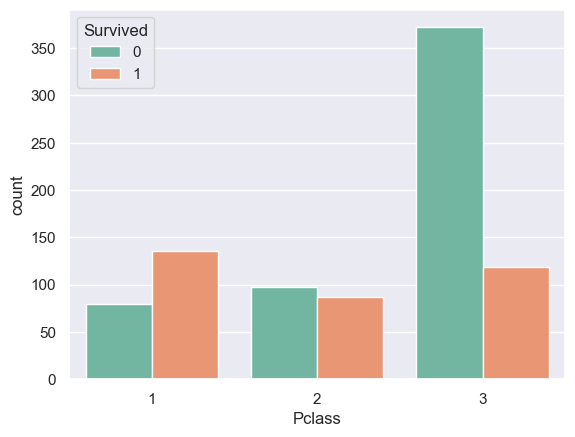

In [19]:
# number of people survived based on Pclass
sns.set()
sns.countplot(x='Pclass', hue='Survived', data=titanic, palette='Set2')

<Axes: xlabel='Embarked', ylabel='count'>

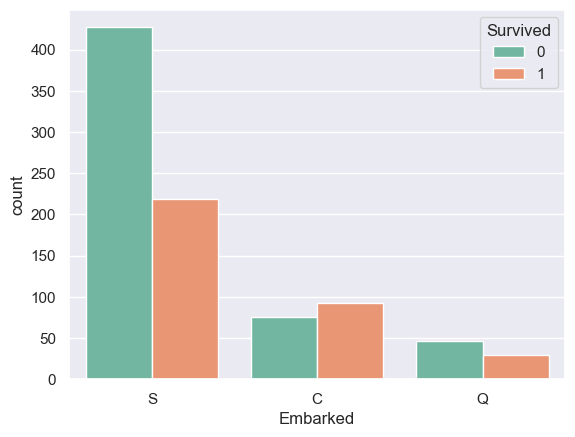

In [20]:
# number of people survived based on Embarked column
sns.set()
sns.countplot(x='Embarked', hue='Survived', data=titanic, palette='Set2')

<Axes: xlabel='SibSp', ylabel='count'>

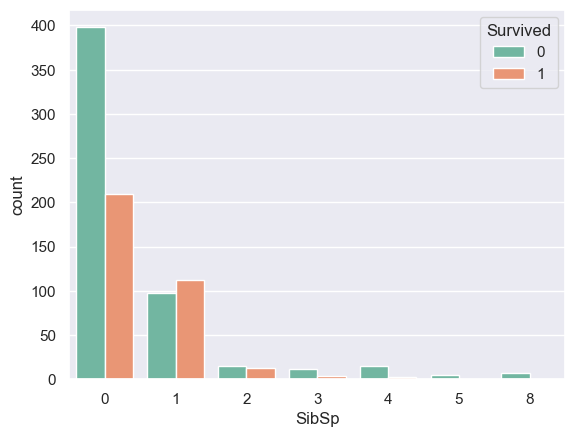

In [21]:
# number of people survived based on SibSp column
sns.set()
sns.countplot(x='SibSp', hue='Survived', data=titanic, palette='Set2')


ENCODING CATEGORICAL DATA COLUMNS

In [22]:
titanic['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [23]:
titanic['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [24]:
import pandas as pd
titanic.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

C:\Users\arunk\AppData\Local\Temp\ipykernel_6916\1459461294.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)


In [25]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


SEPARATING TARGETS AND FEATURES COLUMNS

In [26]:
X=titanic.drop(columns=['PassengerId','Name','Ticket','Survived','Fare'], axis=1)
Y=titanic['Survived']

In [27]:
X

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,22.000000,1,0,0
1,1,1,38.000000,1,0,1
2,3,1,26.000000,0,0,0
3,1,1,35.000000,1,0,0
4,3,0,35.000000,0,0,0
...,...,...,...,...,...,...
886,2,0,27.000000,0,0,0
887,1,1,19.000000,0,0,0
888,3,1,29.699118,1,2,0
889,1,0,26.000000,0,0,1


In [28]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Spliting data into train and test data

In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [30]:
print(X.shape,X_train.shape, X_test.shape)

(891, 6) (712, 6) (179, 6)


MODEL TRAINING USING LOGISTIC REGRESSION

In [31]:
model=LogisticRegression()

In [32]:
# TRAINING THE LOGISTIC REGRESSION MODEL WITH TRAIN DATA
model.fit(X_train, Y_train)

LogisticRegression()

EVALUTING THE MODEL BASED ON ACCURACY SCORE

In [33]:
#accuracy on train data
X_train_prediction=model.predict(X_train)

In [34]:
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)
training_data_accuracy

0.8117977528089888

In [35]:
#accuracy on test data
X_test_prediction=model.predict(X_test)

In [36]:
test_data_accuracy=accuracy_score(Y_test,X_test_prediction)
test_data_accuracy

0.7877094972067039

USER INPUT PREDICTION MODEL

In [37]:
# Function to take user input and make a prediction
def get_user_input():
    Pclass = int(input("Enter Pclass (1, 2, 3): "))
    Sex = input("Enter Sex (male, female): ").lower()
    Sex = 0 if Sex == 'male' else 1
    Age = float(input("Enter Age: "))
    SibSp = int(input("Enter number of siblings/spouses aboard: "))
    Parch = int(input("Enter number of parents/children aboard: "))
    Embarked = input("Enter Embarked (S, C, Q): ").upper()
    Embarked = {'S': 0, 'C': 1, 'Q': 2}[Embarked]
    
    # Create a DataFrame from the user input
    user_data = pd.DataFrame([[Pclass, Sex, Age, SibSp, Parch, Embarked]], 
                             columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'])
    
    # Make a prediction
    prediction = model.predict(user_data)
    prediction_proba = model.predict_proba(user_data)
    
    # Determine the predicted survival status and probability
    result = 'Survived' if prediction[0] == 1 else 'Did not survive'
    probability = prediction_proba[0][prediction[0]] * 100
    
    # Output the result
    print(f'Prediction: {result} with a probability of {probability:.2f}%')

# Take user input and predict
get_user_input()

Enter Pclass (1, 2, 3):  1
Enter Sex (male, female):  male
Enter Age:  30
Enter number of siblings/spouses aboard:  0
Enter number of parents/children aboard:  0
Enter Embarked (S, C, Q):  S


Prediction: Did not survive with a probability of 51.98%
